In [1]:
import numpy as np
np.set_printoptions(precision=4,suppress=True)
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import pickle

In [4]:
documents = pickle.load(open('documents.pl','rb'))
labels = pickle.load(open('labels.pl','rb'))
tags = pickle.load(open('tags.pl','rb'))

In [ ]:
unique(labels)

In [5]:
{i:label for i, label in enumerate(labels)}

{0: nan,
 1: 'Mobilfunk',
 2: nan,
 3: 'Festnetz',
 4: nan,
 5: 'MMS',
 6: nan,
 7: 'MMS',
 8: nan,
 9: 'Festnetz COM',
 10: nan,
 11: nan,
 12: 'Mobilfunk COM',
 13: 'Mobilfunk',
 14: 'Festnetz COM',
 15: nan,
 16: 'Festnetz',
 17: nan,
 18: nan,
 19: 'Mobilfunk',
 20: nan,
 21: 'Festnetz',
 22: 'Festnetz COM',
 23: nan,
 24: nan,
 25: nan,
 26: 'Festnetz',
 27: nan,
 28: 'Mobilfunk',
 29: nan,
 30: 'Mobilfunk',
 31: 'Festnetz',
 32: 'Mobilfunk',
 33: 'Festnetz',
 34: 'Festnetz',
 35: nan,
 36: 'Mobilfunk',
 37: nan,
 38: nan,
 39: 'MMS',
 40: nan,
 41: 'Mobilfunk',
 42: 'GK',
 43: 'Mobilfunk',
 44: 'Festnetz',
 45: 'Festnetz',
 46: nan,
 47: 'Festnetz COM',
 48: 'Mobilfunk',
 49: 'Festnetz',
 50: 'Mobilfunk',
 51: 'Mobilfunk',
 52: 'Festnetz',
 53: 'MMS',
 54: 'Mobilfunk',
 55: nan,
 56: 'MMS',
 57: 'Festnetz',
 58: nan,
 59: 'Mobilfunk',
 60: nan,
 61: 'MMS',
 62: 'Mobilfunk',
 63: 'Mobilfunk',
 64: 'Festnetz',
 65: nan,
 66: nan,
 67: 'Festnetz',
 68: nan,
 69: nan,
 70: nan,
 71: 

In [140]:
from collections import defaultdict

raw_df.Tag.replace(to_replace=tag_filter, inplace=True)

def f(x):
     return pd.Series(dict(SichterName = set(x.SichterName) - {np.nan},
                                   Tag = set(x.Tag),
                               Content = list(x.Content),
                                  Kind = list(x.kind)))

df = raw_df.query('(kind==1 or kind==3)').sort_values(['Datetime'],ascending=True).groupby('TwistId').apply(f)

KeyboardInterrupt: 

In [ ]:
df

In [36]:
import re
GRUBER_URLINTEXT_PAT = re.compile(r'(?i)\b((?:https?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:\'".,<>?\xab\xbb\u201c\u201d\u2018\u2019]))')
NUMBER_CLEAN = re.compile(r'\d+(:?[.,]?\d+)*')
TIME_CLEAN = re.compile(r'\d+:\d+(?:\s?[Uu]hr)?')

def preprocessing(text):
    # clean-up url
    text = GRUBER_URLINTEXT_PAT.sub('<url>', text)
    # remove time
    text = TIME_CLEAN.sub('<time>', text)
    # clean-up numbers
    text = NUMBER_CLEAN.sub('<number>', text)
    return text

preprocessing('Yeah , der WG gefällt deine Musik . Hol dir auch superschnelles Internet ! https://t.co/0dPArCUv0b https://t.co/HHRZaAQnte http://pbs.twimg.com/amplify_video_thumb/0123456789001234567890/img/QEQntlwB_ifYH3Gv.jpg')

In [94]:
documents = [] # Content
docs = [] # Content
labels = [] # SichterName
tags = [] # Tag

for (idx, row) in df.iterrows():
    if type(row.Tag) is str or row.Tag < 0:
        continue
    labels.append(row.SichterName)
    documents.append([preprocessing(text) for text in row.Content])
    docs.append([nlp(document) for document in documents[-1]])
    tags.append(int(row.Tag>0))

print(len(documents))

50


In [92]:
documents[0][0][13]

'I'

In [95]:
tags

[0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0]

In [98]:
prios = np.array(tags)
prios = np.array(prios, dtype=int)
prios[:50]

array([0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0])

In [99]:
labels[0], documents[0], docs[0], prios[0]

(set(),
 ['HighTechno ! Ich will Claras WG mal so richtig zu #Elektro dancen sehen . <url>',
  'Yeah , der WG gefällt deine Musik . Hol dir auch superschnelles Internet ! <url> <url> <url>'],
 [HighTechno ! Ich will Claras WG mal so richtig zu #Elektro dancen sehen . <url>,
  Yeah , der WG gefällt deine Musik . Hol dir auch superschnelles Internet ! <url> <url> <url>],
 0)

In [102]:
from collections import Counter
# create lemma lists filter punctuation and numbers
# from spacy
lemmas = [word.lemma_ for ldocs in docs for words in ldocs for word in words if word.pos_ not in ['PUNCT','NUM']]
counts = Counter(lemmas)

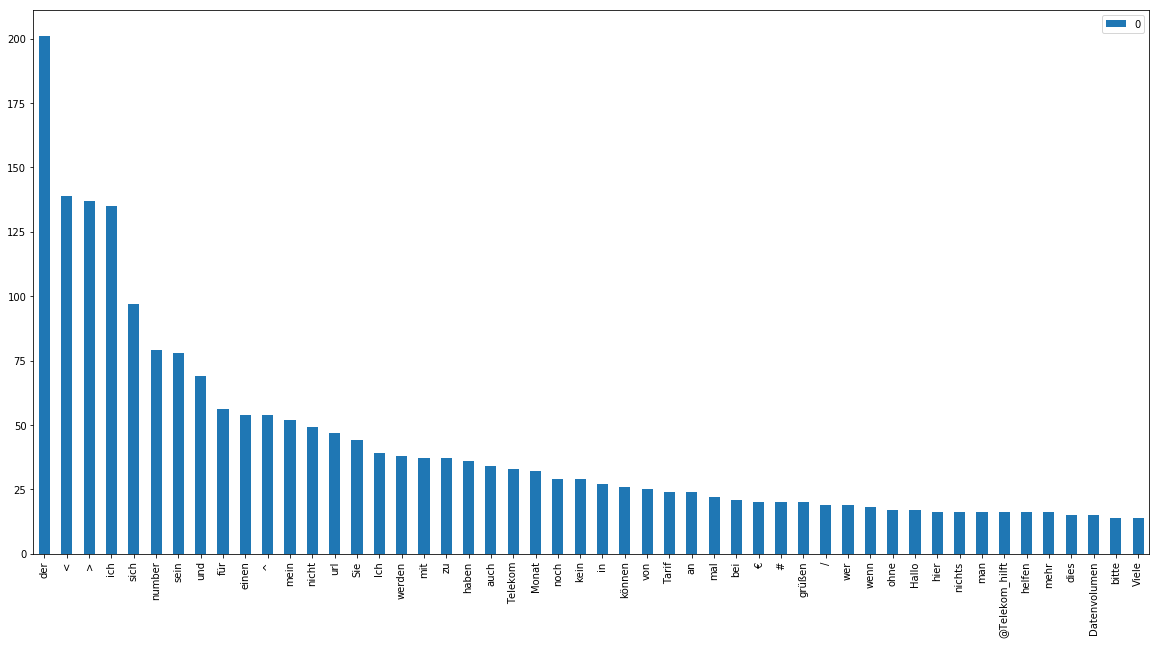

In [103]:
lemma_df = pd.DataFrame.from_dict(counts, orient='index')
lemma_df.sort_values(by=0,ascending=False).head(50).plot(kind='bar', figsize=(20,10))

# Feature Analysis

Text(0.5,0,'number of words')

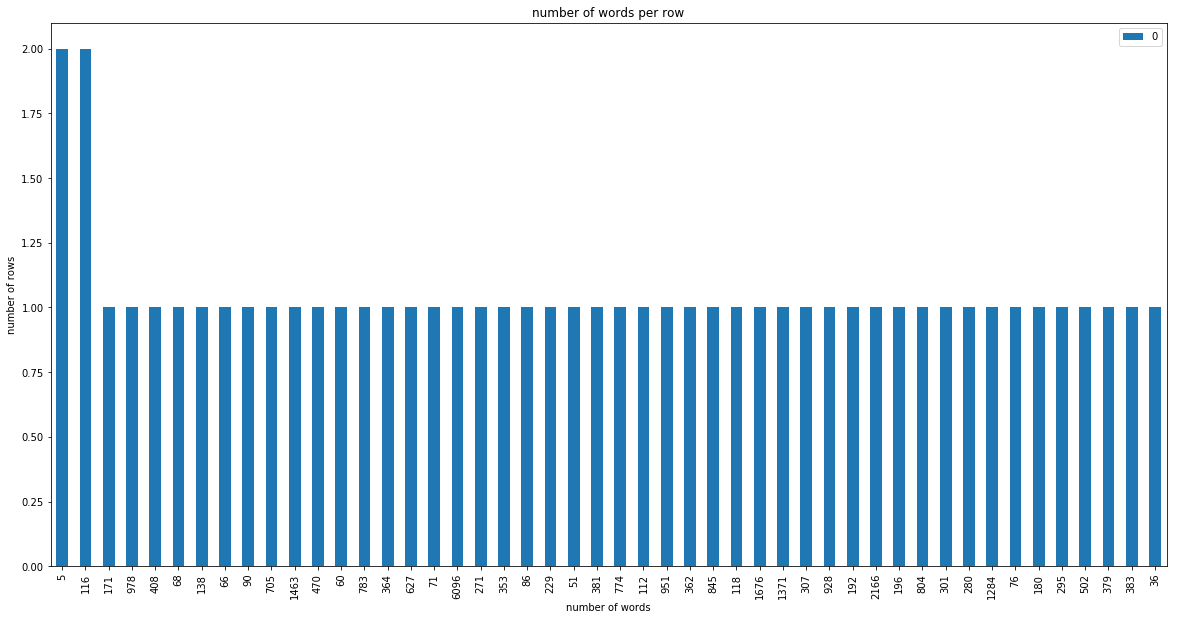

In [105]:
lemmas = [sum([len(word) for word in words]) for words in documents]
word_counts = Counter(lemmas)

lemma_df = pd.DataFrame.from_dict(word_counts, orient='index')
a = lemma_df.sort_values(by=0,ascending=False).head(50).plot(kind='bar', figsize=(20,10))
a.set_title('number of words per row')
a.set_ylabel('number of rows')
a.set_xlabel('number of words')

Text(0.5,0,'number of words')

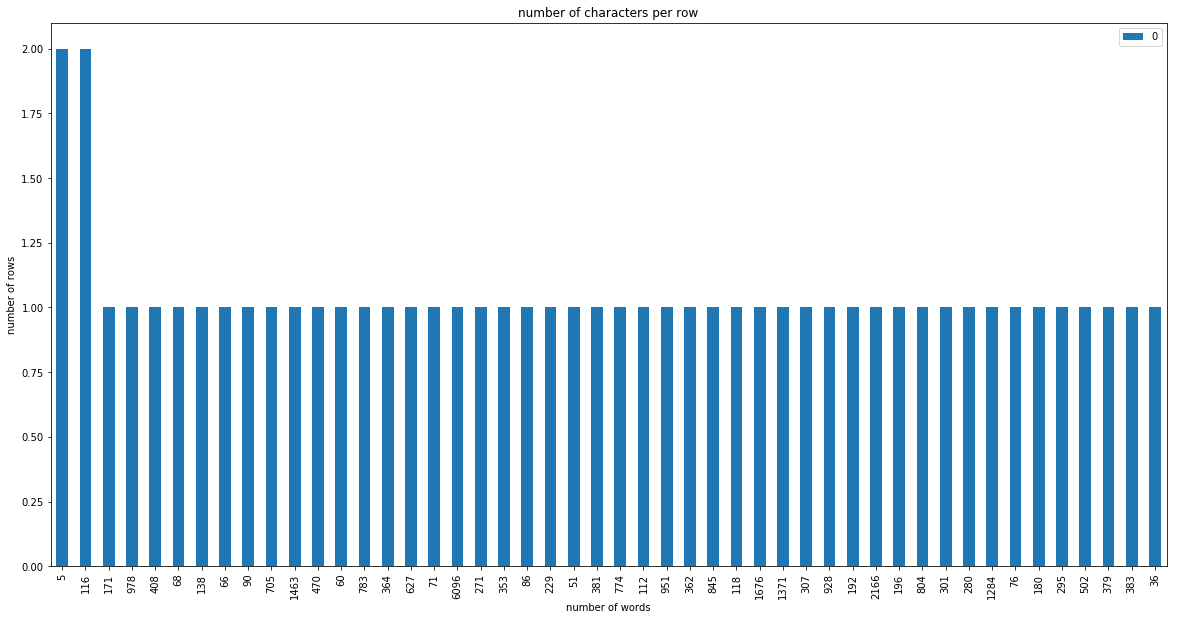

In [106]:
lemmas = [sum([len(word) for word in words]) for words in documents]
word_counts = Counter(lemmas)

lemma_df = pd.DataFrame.from_dict(word_counts, orient='index')
a = lemma_df.sort_values(by=0,ascending=False).head(50).plot(kind='bar', figsize=(20,10))
a.set_title('number of characters per row')
a.set_ylabel('number of rows')
a.set_xlabel('number of words')

(-0.5, 1439.5, 1079.5, -0.5)

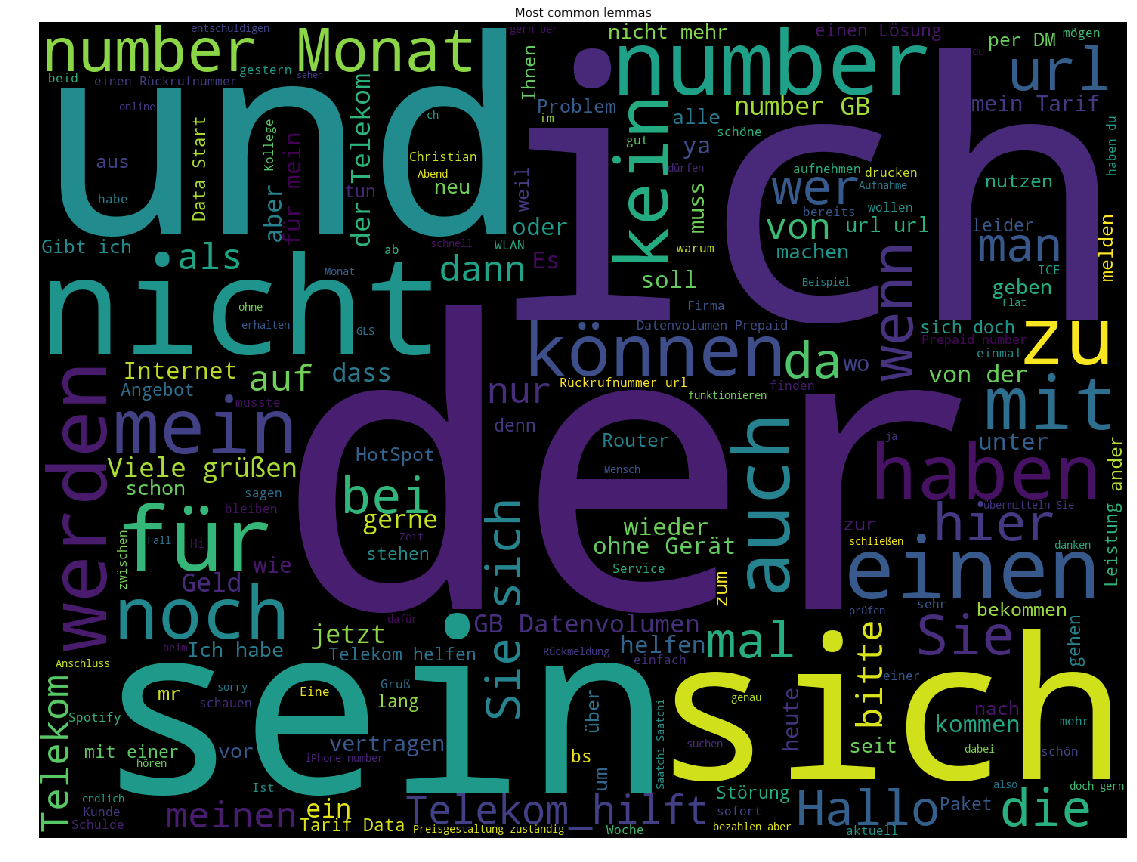

In [108]:
from wordcloud import WordCloud
cloud = WordCloud(width=1440, height=1080).generate(" ".join([word.lemma_ for doc in docs for words in doc for word in words]))
plt.figure(figsize=(20, 15))
plt.imshow(cloud)
plt.title('Most common lemmas')
plt.axis('off')

In [109]:
with open('./stopwords-de.txt') as f:
    stopwords = f.read().split('\n')

(-0.5, 1439.5, 1079.5, -0.5)

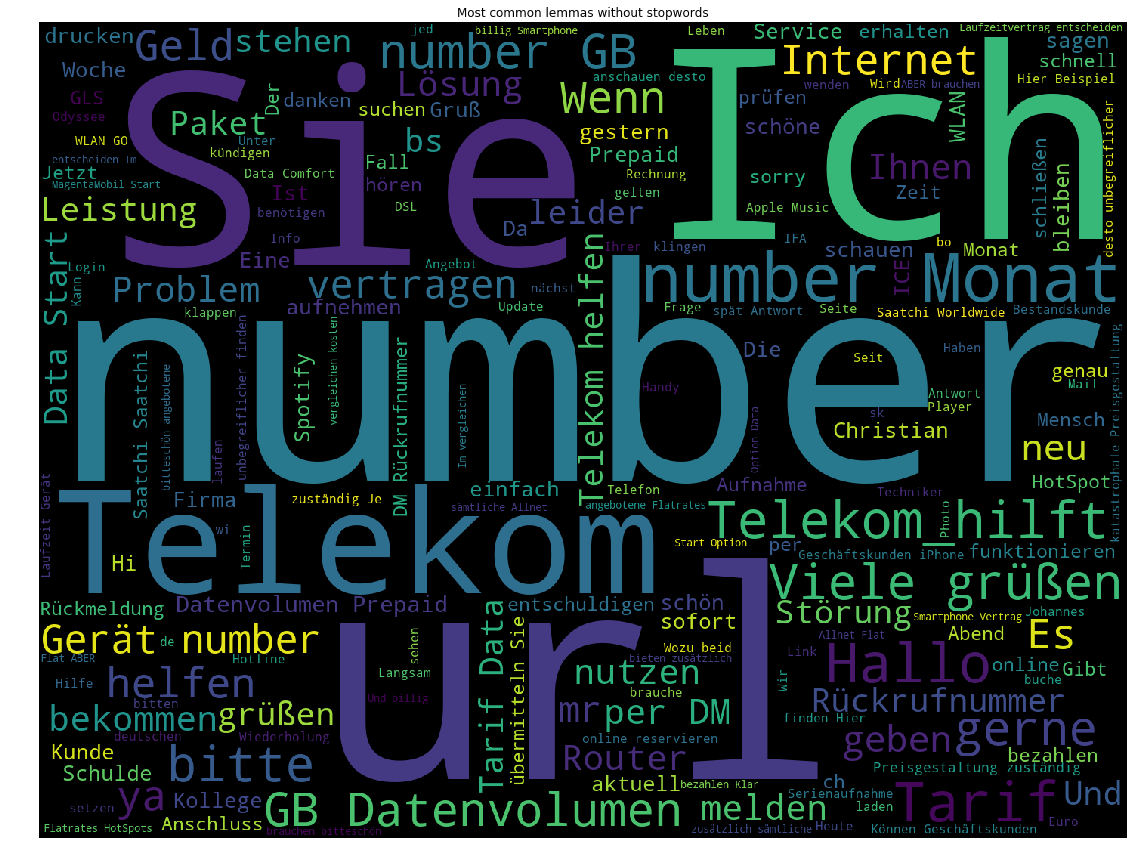

In [110]:
from wordcloud import WordCloud
cloud = WordCloud(width=1440, height=1080).generate(" ".join([word.lemma_ for doc in docs for words in doc for word in words if word.lemma_ not in stopwords]))
plt.figure(figsize=(20, 15))
plt.imshow(cloud)
plt.title('Most common lemmas without stopwords')
plt.axis('off')

In [118]:
qmarks = np.mean(df.Content.apply(lambda x: max(['?' in y for y in x])))
math = np.mean(df.Content.apply(lambda x: max(['€' in y for y in x])))
fullstop = np.mean(df.Content.apply(lambda x:  max(['.' in y for y in x])))
capital_first = np.mean(df.Content.apply(lambda x: x[0][0].isupper()))
capitals = np.mean(df.Content.apply(lambda x: max([tok.isupper() for y in x for tok in y.split(' ')])))
numbers = np.mean(df.Content.apply(lambda x: max([char.isdigit() for y in x for char in y])))

print('Rows with question marks: {:.2f}%'.format(qmarks * 100))
print('Rows with €: {:.2f}%'.format(math * 100))
print('Rows with full stops: {:.2f}%'.format(fullstop * 100))
print('Rows with capitalised first letters: {:.2f}%'.format(capital_first * 100))
print('Rows with capital letters: {:.2f}%'.format(capitals * 100))
print('Rows with numbers: {:.2f}%'.format(numbers * 100))

Rows with question marks: 62.30%
Rows with €: 4.92%
Rows with full stops: 85.25%
Rows with capitalised first letters: 60.66%
Rows with capital letters: 59.02%
Rows with numbers: 62.30%


In [119]:
# TODO: try different sets of stopwords (e.g. with or without kein, nicht)

In [120]:
# wordvectors:
w2v = [[word.vector for word in doc if word.text not in stopwords] for doc in docs]

# average w2v
X = np.array([np.mean([word.vector for word in doc if word.text not in stopwords], 0) for doc in docs])

In [124]:
# bag of words
from sklearn.feature_extraction.text import CountVectorizer

CountVectorizer()
BoW = CountVectorizer(documents)

In [125]:
X_bag = BoW.fit_transform(documents)

AttributeError: 'list' object has no attribute 'lower'

In [26]:
X_bag[0]

<1x465 sparse matrix of type '<class 'numpy.int64'>'
	with 21 stored elements in Compressed Sparse Row format>

In [27]:
Y = np.array(prios,dtype=int)

In [28]:
spacy.info('de')


    Info about model de

    lang               de             
    pipeline           ['tagger', 'parser', 'ner']
    accuracy           {'token_acc': 99.7350249964, 'ents_p': 82.8423083593, 'ents_r': 82.8647634743, 'uas': 91.7982430106, 'tags_acc': 97.1511050734, 'ents_f': 82.8535343954, 'las': 89.7518846085}
    name               core_news_sm   
    license            CC BY-SA 3.0   
    author             Explosion AI   
    url                https://explosion.ai
    notes              Because the model is trained on Wikipedia, it may perform inconsistently on many genres, such as social media text. The NER accuracy refers to the "silver standard" annotations in the WikiNER corpus. Accuracy on these annotations tends to be higher than correct human annotations.
    vectors            {'keys': 0, 'width': 0, 'vectors': 0}
    sources            ['TIGER Corpus', 'Wikipedia']
    version            2.0.0a0        
    spacy_version      >=2.0.0a18     
    parent_package     spacy-

In [29]:
import xgboost as xgb

# Set our parameters for xgboost
params = {}
params['objective'] = 'binary:logistic'
params['eval_metric'] = 'logloss'
params['eta'] = 0.02
params['max_depth'] = 4

In [30]:
# Code for cross-validation
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import StratifiedKFold
from sklearn.naive_bayes import GaussianNB
from sklearn.utils import class_weight
from sklearn.metrics import f1_score

# Create 2 folds
k = 2
kfold = StratifiedKFold(Y, k, shuffle=True, random_state=0)

results = np.zeros(k)

# iterate over two folds
for i, (train_ind, test_ind) in enumerate(kfold):
    X_train, X_val, Y_train, Y_val = X_bag[train_ind], X_bag[test_ind], Y[train_ind], Y[test_ind]
    gnb = GaussianNB()
    D_train = xgb.DMatrix(X_train, label=Y_train)
    D_val = xgb.DMatrix(X_val, label=Y_val)

    weights = class_weight.compute_sample_weight('balanced', [0,1], Y_train)
    weightss = []
    for y in Y_train:
        weightss.append(weights[y])

#     predictions = gnb.fit(X_train, Y_train, sample_weight=weightss).predict(X_val)
    watchlist = [(D_train, 'train'), (D_val, 'valid')]

    bst = xgb.train(params, D_train, 400, watchlist, early_stopping_rounds=50, verbose_eval=10)
    predictions = bst.predict(data=D_val).round()
    results[i] = f1_score(predictions, Y_val)
    print('f1 score: {}'.format(results[i]))
    print('accuracy: {}\%'.format(sum(predictions==Y_val)/len(Y_val)*100))

[0]	train-logloss:0.683401	valid-logloss:0.683401
Multiple eval metrics have been passed: 'valid-logloss' will be used for early stopping.

Will train until valid-logloss hasn't improved in 50 rounds.
[10]	train-logloss:0.599961	valid-logloss:0.599961
[20]	train-logloss:0.536703	valid-logloss:0.536703
[30]	train-logloss:0.488091	valid-logloss:0.488091
[40]	train-logloss:0.450353	valid-logloss:0.450353
[50]	train-logloss:0.420827	valid-logloss:0.420827
[60]	train-logloss:0.397045	valid-logloss:0.402723
[70]	train-logloss:0.377983	valid-logloss:0.383775
[80]	train-logloss:0.362852	valid-logloss:0.368741
[90]	train-logloss:0.350799	valid-logloss:0.356772


/usr/local/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


[100]	train-logloss:0.341169	valid-logloss:0.347214
[110]	train-logloss:0.333454	valid-logloss:0.339562
[120]	train-logloss:0.327258	valid-logloss:0.333421
[130]	train-logloss:0.322272	valid-logloss:0.328482
[140]	train-logloss:0.318251	valid-logloss:0.324502
[150]	train-logloss:0.315003	valid-logloss:0.32129
[160]	train-logloss:0.312375	valid-logloss:0.318693
[170]	train-logloss:0.310244	valid-logloss:0.316591
[180]	train-logloss:0.308515	valid-logloss:0.314886
[190]	train-logloss:0.307109	valid-logloss:0.313502
[200]	train-logloss:0.305965	valid-logloss:0.312377
[210]	train-logloss:0.305033	valid-logloss:0.311462
[220]	train-logloss:0.304273	valid-logloss:0.310717
[230]	train-logloss:0.303652	valid-logloss:0.310109
[240]	train-logloss:0.303144	valid-logloss:0.309614
[250]	train-logloss:0.302729	valid-logloss:0.30921
[260]	train-logloss:0.302389	valid-logloss:0.308879
[270]	train-logloss:0.302111	valid-logloss:0.308609
[280]	train-logloss:0.301883	valid-logloss:0.308389
[290]	train-lo

/usr/local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)


[90]	train-logloss:0.351342	valid-logloss:0.353958
[100]	train-logloss:0.341809	valid-logloss:0.344524
[110]	train-logloss:0.334171	valid-logloss:0.336971
[120]	train-logloss:0.328037	valid-logloss:0.330911
[130]	train-logloss:0.3231	valid-logloss:0.326039
[140]	train-logloss:0.319118	valid-logloss:0.322113
[150]	train-logloss:0.315902	valid-logloss:0.318946
[160]	train-logloss:0.313298	valid-logloss:0.316386
[170]	train-logloss:0.311188	valid-logloss:0.314313
[180]	train-logloss:0.309475	valid-logloss:0.312634
[190]	train-logloss:0.308083	valid-logloss:0.311271
[200]	train-logloss:0.30695	valid-logloss:0.310164
[210]	train-logloss:0.306026	valid-logloss:0.309263
[220]	train-logloss:0.305273	valid-logloss:0.30853
[230]	train-logloss:0.304658	valid-logloss:0.307934
[240]	train-logloss:0.304155	valid-logloss:0.307447
[250]	train-logloss:0.303744	valid-logloss:0.30705
[260]	train-logloss:0.303407	valid-logloss:0.306727
[270]	train-logloss:0.303131	valid-logloss:0.306463
[280]	train-loglos

In [31]:
X_bag.shape

(22, 465)

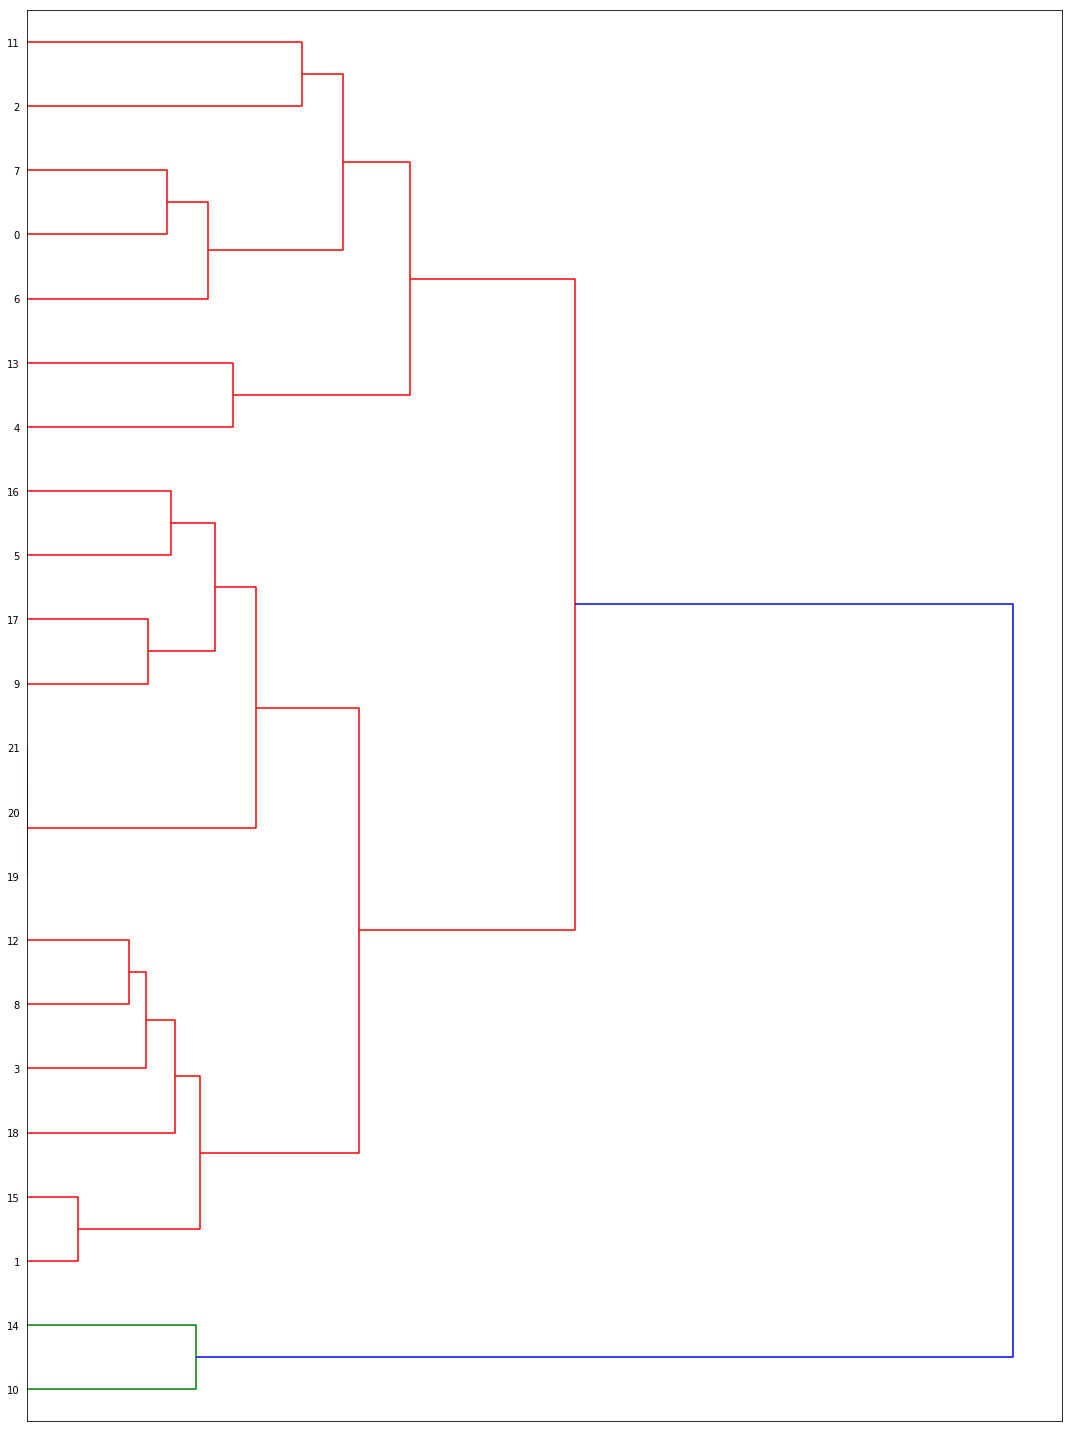

In [32]:
from scipy.cluster.hierarchy import ward, dendrogram
from sklearn.metrics.pairwise import cosine_similarity

dist = 1 - cosine_similarity(X)
linkage_matrix = ward(dist) #define the linkage_matrix using ward clustering pre-computed distances

fig, ax = plt.subplots(figsize=(15, 20)) # set size
ax = dendrogram(linkage_matrix, orientation="right", labels=np.arange(X.shape[0]));

plt.tick_params(\
    axis= 'x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='off')

plt.tight_layout() #show plot with tight layout

#uncomment below to save figure
plt.savefig('ward_clusters.png', dpi=200) #save figure as ward_clusters

In [33]:
np.array(documents)[[17,9]]

array(['@Telekom_hilft Habt ihr aktuell Störungen beim WLAN ?',
       'Wird es neben dem neuen kostenfreien WLAN im ICE auch noch @Telekom_hilft Hotspots geben ?'],
      dtype='<U1638')

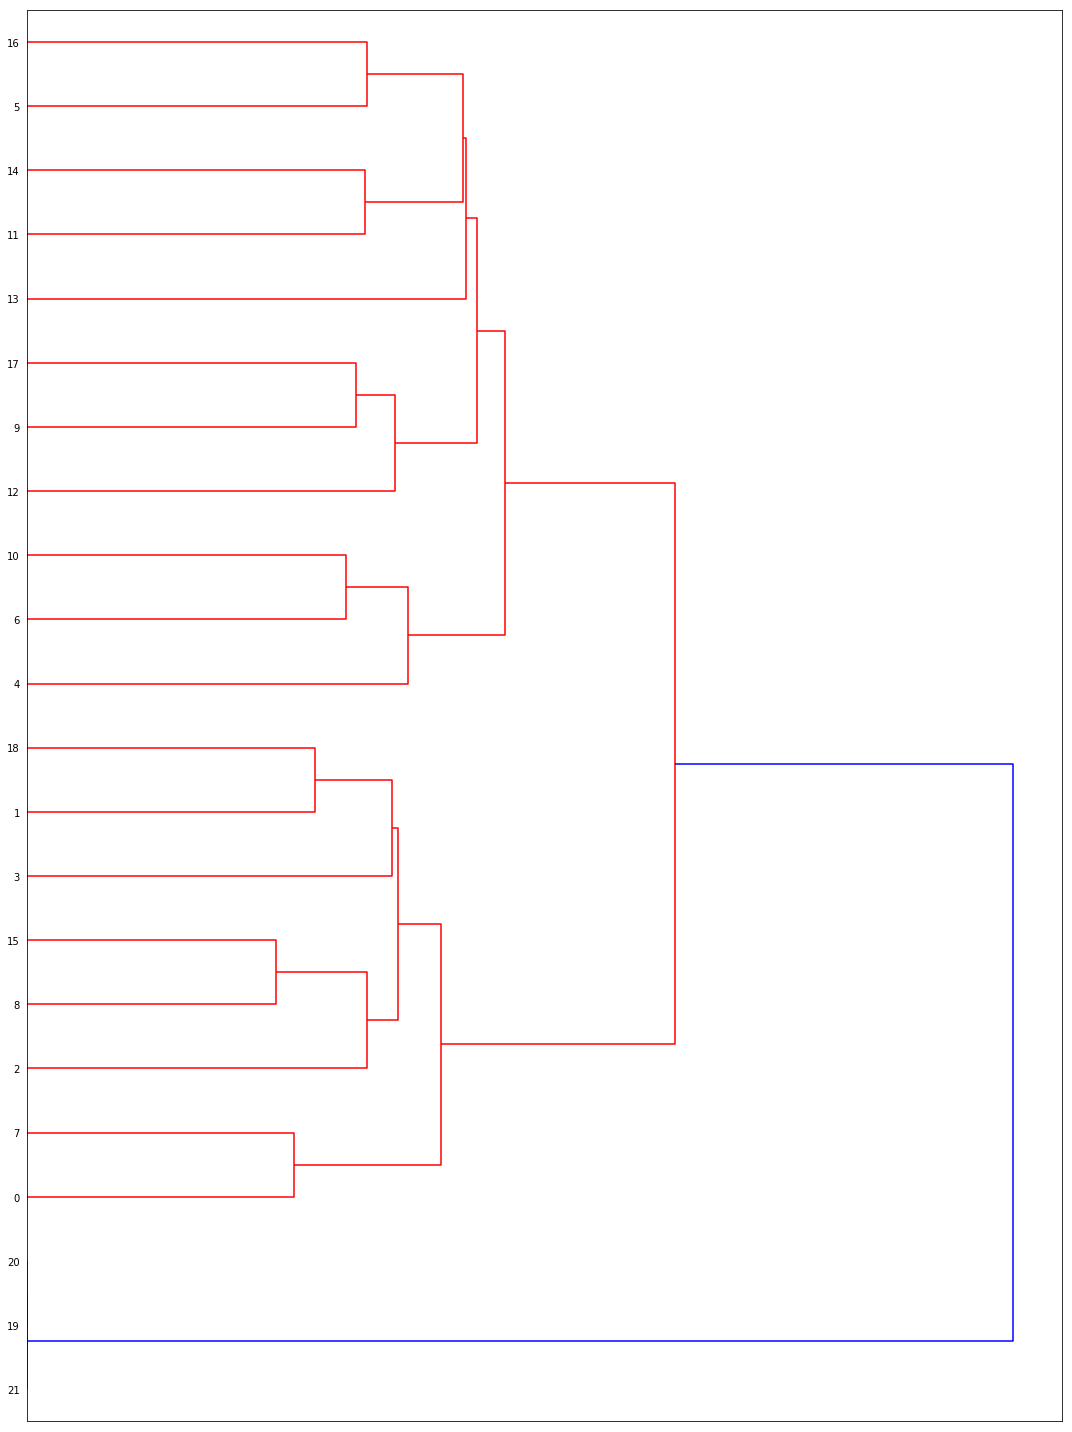

In [34]:
dist = 1 - cosine_similarity(X_bag)
linkage_matrix = ward(dist) #define the linkage_matrix using ward clustering pre-computed distances

fig, ax = plt.subplots(figsize=(15, 20)) # set size
ax = dendrogram(linkage_matrix, orientation="right", labels=np.arange(X.shape[0]));

plt.tick_params(\
    axis= 'x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='off')

plt.tight_layout() #show plot with tight layout

#uncomment below to save figure
plt.savefig('ward_clusters.png', dpi=200) #save figure as ward_clusters

In [35]:
linkage_matrix

array([[19.    , 20.    ,  0.    ,  2.    ],
       [21.    , 22.    ,  0.    ,  3.    ],
       [ 8.    , 15.    ,  0.8793,  2.    ],
       [ 0.    ,  7.    ,  0.9438,  2.    ],
       [ 1.    , 18.    ,  1.0172,  2.    ],
       [ 6.    , 10.    ,  1.1297,  2.    ],
       [ 9.    , 17.    ,  1.1639,  2.    ],
       [11.    , 14.    ,  1.1969,  2.    ],
       [ 5.    , 16.    ,  1.2019,  2.    ],
       [ 2.    , 24.    ,  1.203 ,  3.    ],
       [ 3.    , 26.    ,  1.2898,  3.    ],
       [12.    , 28.    ,  1.3011,  3.    ],
       [31.    , 32.    ,  1.3115,  6.    ],
       [ 4.    , 27.    ,  1.3482,  3.    ],
       [25.    , 34.    ,  1.4638,  8.    ],
       [29.    , 30.    ,  1.5408,  4.    ],
       [13.    , 37.    ,  1.5511,  5.    ],
       [33.    , 38.    ,  1.5925,  8.    ],
       [35.    , 39.    ,  1.6898, 11.    ],
       [36.    , 40.    ,  2.2912, 19.    ],
       [23.    , 41.    ,  3.4862, 22.    ]])

In [36]:
ward(dist)

array([[19.    , 20.    ,  0.    ,  2.    ],
       [21.    , 22.    ,  0.    ,  3.    ],
       [ 8.    , 15.    ,  0.8793,  2.    ],
       [ 0.    ,  7.    ,  0.9438,  2.    ],
       [ 1.    , 18.    ,  1.0172,  2.    ],
       [ 6.    , 10.    ,  1.1297,  2.    ],
       [ 9.    , 17.    ,  1.1639,  2.    ],
       [11.    , 14.    ,  1.1969,  2.    ],
       [ 5.    , 16.    ,  1.2019,  2.    ],
       [ 2.    , 24.    ,  1.203 ,  3.    ],
       [ 3.    , 26.    ,  1.2898,  3.    ],
       [12.    , 28.    ,  1.3011,  3.    ],
       [31.    , 32.    ,  1.3115,  6.    ],
       [ 4.    , 27.    ,  1.3482,  3.    ],
       [25.    , 34.    ,  1.4638,  8.    ],
       [29.    , 30.    ,  1.5408,  4.    ],
       [13.    , 37.    ,  1.5511,  5.    ],
       [33.    , 38.    ,  1.5925,  8.    ],
       [35.    , 39.    ,  1.6898, 11.    ],
       [36.    , 40.    ,  2.2912, 19.    ],
       [23.    , 41.    ,  3.4862, 22.    ]])